In [1]:
import os
import numpy as np
import pandas as pd
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from agrobrain_util.infra.app_config import application_config as cfg

from skimage import io
import matplotlib.pyplot as plt
import json
import random
import glob
import datetime
from tqdm import tqdm
from datetime import datetime


env = RuntimeEnv()
categories_dict = cfg['tags']['categories']

could not find ETI_EMAIL in environment variables
could not find ETI_PASS in environment variables
could not find stamp in environment variables
could not find stamp in environment variables
could not find KUBEFLOW_API_BASIC_AUTH_TOKEN in environment variables
could not find AI_RABBITMQ_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING in environment variables
could not find TARANIS_DB_CONNECTION_STRING in environment variables
could not find GLOBAL_DB_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING_NEW in environment variables
could not find ETI_DB_USER in environment variables
could not find ETI_DB_PASS in environment variables


In [2]:
# # TRY WITH EXAMPLE IMAGE
# example_zoom_im_id = 1000
# image = env.get_image(example_zoom_im_id)
# image_data = env.eti_api.get_images_data([example_zoom_im_id])
# image_weeds_data = [d for d in image_data['images'][0]['stats'] if d.get('category') == categories_dict['weed']]

# Filter and save filtered DataFrame

In [3]:
# # READ IMAGES_DF
# images_df_path = '/mnt/disks/datasets/wide_images/images_df_new.csv'
# images_df = pd.read_csv(images_df_path)
# images_df['uploadDate_time'] = images_df['uploadDate'].apply(datetime.datetime.fromtimestamp)

In [12]:
# images_df.columns
# snapshotDate,

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'imageID', 'identifier',
       'parcelID', 'snapshotDate', 'timeGps', 'uploadDate', 'fieldID',
       'cropID', 'flightID', 'clientID', 'heightAboveGround', 'quality', 'lat',
       'lon', 'flag', 'healthy', 'expertReview', 'taggerReview', 'taggerDone',
       'autoDone', 'blackList', 'hasTiles', 'format', 'height', 'width',
       'focalLength', 'deleted', 'comment', 'stats', 'stamp', 'plantReport',
       'orderID', 'cameraFileName', 'ignored', 'flightTargetHeight',
       'cameraDegree', 'contrast', 'brightness', 'sharpness', 'typeId',
       'groupUUID', 'cameraModel', 'footprintArea', 'footprintGeography',
       'objectDistance', 'cameraAngle', 'tagsLastVersion', 'imgUrl',
       'fieldName', 'farmID', 'farmName', 'clientName', 'fieldGeojson',
       'cropName', 'num_weed_tags', 'uploadDate_time'],
      dtype='object')

In [4]:
# FILTER DF AND TAKE THE MOST PROBABLE IMAGES (TO CONTAIN WEEDS) FROM EACH CROP 

def uniquify_path(path):
    filepath = path.replace(".csv", "")
    counter = 1
    while os.path.exists(path):
        path = filepath.replace(".csv", "") + f"_{counter}.csv"
        counter += 1
    return path

DF_FOLDER = "/mnt/disks/datasets/wide_images/"

filtered_images_df = images_df[(images_df['cameraAngle'] > -95) & (images_df['cameraAngle'] < -85)]
NUM_OF_IMAGES_FROM_EACH_CROP = 50

top_weeds_corn = filtered_images_df[filtered_images_df['cropName']=='Corn'].nlargest(NUM_OF_IMAGES_FROM_EACH_CROP, 'num_weed_tags')
top_weeds_soy = filtered_images_df[filtered_images_df['cropName']=='Soybean'].nlargest(NUM_OF_IMAGES_FROM_EACH_CROP, 'num_weed_tags')
top_weeds_df = pd.concat([top_weeds_corn, top_weeds_soy], axis='rows', ignore_index=True)


top_weeds_df['wideImageID'] = env.eti_api.get_matching_wide_images(list(top_weeds_df['imageID']))
top_weeds_df['wideImageID'] = top_weeds_df['wideImageID'].fillna(-1).astype(int)

# file_path = uniquify_path(os.path.join(DF_FOLDER, f"filtered_df.csv"))
# top_weeds_df.to_csv(file_path)

NameError: name 'images_df' is not defined

In [6]:
# FILTER DF AND TAKE THE MOST UNPROBABLE IMAGES (TO CONTAIN WEEDS)

# def uniquify_path(path):
#     filepath = path.replace(".csv", "")
#     counter = 1
#     while os.path.exists(path):
#         path = filepath.replace(".csv", "") + f"_{counter}.csv"
#         counter += 1
#     return path

DF_FOLDER = "/mnt/disks/datasets/wide_images/"

filtered_images_df = images_df[(images_df['cameraAngle'] > -95) & (images_df['cameraAngle'] < -85)]
NUM_OF_IMAGES_FROM_EACH_CROP = 50

buttom_weeds_corn = filtered_images_df[filtered_images_df['cropName']=='Corn'].nsmallest(NUM_OF_IMAGES_FROM_EACH_CROP, 'num_weed_tags')
buttom_weeds_soy = filtered_images_df[filtered_images_df['cropName']=='Soybean'].nsmallest(NUM_OF_IMAGES_FROM_EACH_CROP, 'num_weed_tags')
buttom_weeds_df = pd.concat([buttom_weeds_corn, buttom_weeds_soy], axis='rows', ignore_index=True)

buttom_weeds_df['wideImageID'] = env.eti_api.get_matching_wide_images(list(buttom_weeds_df['imageID']))
buttom_weeds_df['wideImageID'] = buttom_weeds_df['wideImageID'].fillna(-1).astype(int)

# file_path = uniquify_path(os.path.join(DF_FOLDER, f"filtered_df.csv"))
# top_weeds_df.to_csv(file_path)

In [2]:
# FILTER DATAFRAME - ONLY THE IMAGES THAT CONTAINES WEEDS. ADDING WEEDS DATA LIKE TYPE IDS, NAME, COVARAGE
weeds_images_df = pd.read_csv("/mnt/disks/datasets/wide_images/weeds_images_df.csv")
weeds_images_df['weed_types_ids_list'] = weeds_images_df['weed_types_ids_list'].apply(eval)
weeds_images_df['uploadDate_time'] = weeds_images_df['uploadDate'].apply(datetime.fromtimestamp)
images_df = weeds_images_df

NameError: name 'pd' is not defined

# Data exploration

In [3]:
# READ FILTERED DF, ADD SOME COLUMNS
top_weeds_df = pd.read_csv('/mnt/disks/datasets/wide_images/filtered_weeds_df.csv')
top_weeds_df['uploadDate_time'] = top_weeds_df['uploadDate'].apply(datetime.fromtimestamp)
top_weeds_df['uploadDate_date'] = top_weeds_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())
top_weeds_df['weed_types_ids_list'] = top_weeds_df['weed_types_ids_list'].apply(eval)
top_weeds_df['num_weed_types'] = top_weeds_df['weed_types_ids_list'].apply(len)

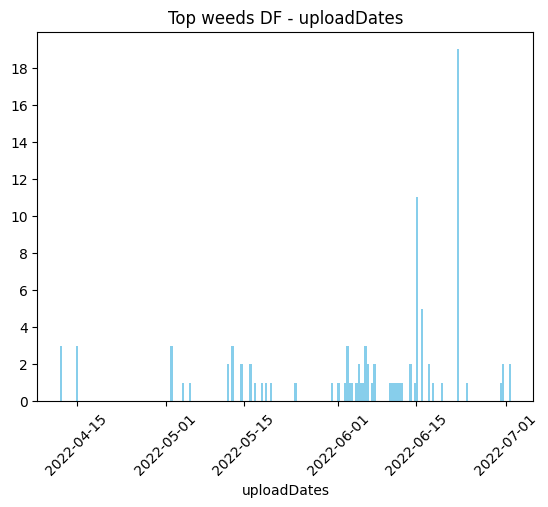

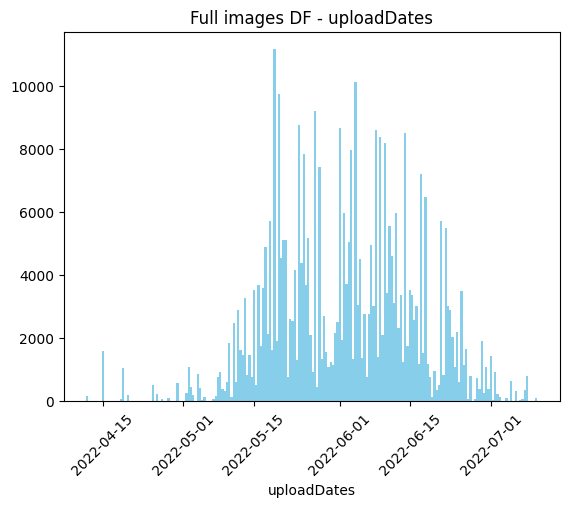

In [9]:
# DISPLAY "UPLOAD DATES" HISTOGRAMS FOR FULL IMAGES DF AND CHOSEN IMAGES DF

plt.hist(top_weeds_df['uploadDate_time'], bins=200, color = 'skyblue')
plt.xlabel('uploadDates')
plt.title('Top weeds DF - uploadDates')
# plt.yticks(np.around(plt.yticks()[0]))
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()

plt.hist(images_df['uploadDate_time'], bins=200, color = 'skyblue')
plt.xlabel('uploadDates')
plt.title('Full images DF - uploadDates')
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()

In [4]:
def create_cat_dict(cat_list):
    cat_dict_types = {}
    cat_dict_names = {}
    for l in cat_list:
        cat_dict_types[l['id']] = l['type']
        if 'name' in l:
            cat_dict_names[l['id']] = l['name']
        else:
            cat_dict_names[l['id']] = 'NoName'
    return cat_dict_types, cat_dict_names

categories_hierarchy = env.eti_api.get_categories_hierarchy()
cat_dict_types, cat_dict_names = create_cat_dict(categories_hierarchy[9]['subCategories'])


unique_weed_types, count_unique_weed_types = np.unique(images_df['weed_types_ids_list'].explode(), return_counts=True)
top_weed_types = unique_weed_types[np.argsort(count_unique_weed_types)[-5:]]
top_weed_types_names = [cat_dict_names[id] for id in top_weed_types]
# print(top_weed_types_names)
top_3_weeds_ids = unique_weed_types[np.argsort(count_unique_weed_types)[-3:]]

In [75]:
count_unique_weed_types

array([     9,    204,      2, 278760,      1,      2,     26,      2,
         1829, 186816,      1,      1,      1,      2,      1,      7,
            5,      5,      2,      6,     11,      2, 110765,      5,
            1,     16,      1,      2,      1,      1,      8])

In [11]:
for id in top_3_weeds_ids:
    print(cat_dict_names[id])

Volunteer corn
Grass - Unidentified
Broadleaf - Unidentified


In [ ]:
top_weeds_df['num_weed_types'] = top_weeds_df['weed_types_ids_list'].apply(len)

In [9]:
images_df['num_weed_types'] = images_df['weed_types_ids_list'].apply(len)

In [67]:
filtered_images_df = images_df[images_df['num_weed_tags']>500]
len(filtered_images_df)

2186

In [15]:
len(images_df)

379390

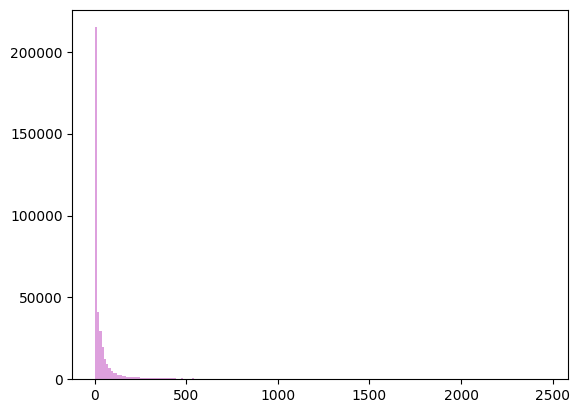

In [14]:
plt.hist(images_df['num_weed_tags'], bins=200, color = 'plum')
plt.show()

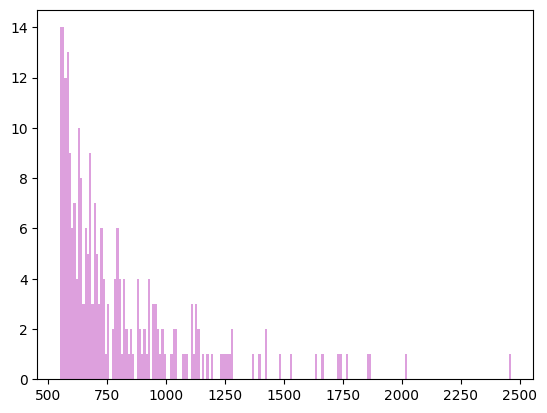

In [54]:

plt.hist(filtered_images_df['num_weed_tags'], bins=200, color = 'plum')
plt.show()

In [ ]:
images_df['num_weed_tags_list']

In [4]:
# CALCULATE "NUM WEED TAGS LIST"
# num_weed_tags_list = {}
images_df["num_weed_tags_list"] = None
for i, im_id in enumerate(tqdm(images_df["imageID"])):
    image_stats_list = eval(images_df['stats'][i])
    image_weed_tags_count = []
    for cat in image_stats_list:
        if cat['category'] == categories_dict['weed']:
            image_weed_tags_count.append(cat['tagsCount'])
    images_df.loc[images_df['imageID'] == im_id, "num_weed_tags_list"] = str(image_weed_tags_count)

100%|██████████| 379390/379390 [07:17<00:00, 867.18it/s]


len of current df: 183


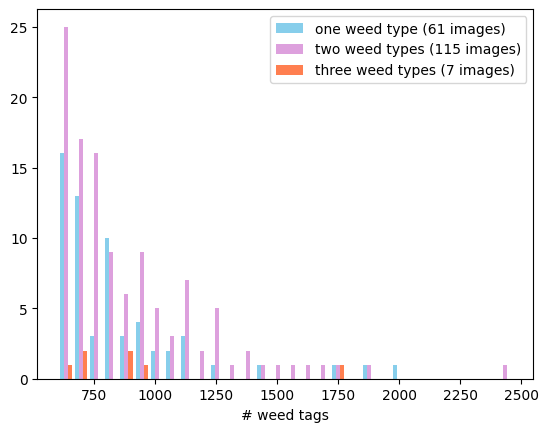

In [86]:
# DISPLAY HISTOGRAMS OF NUM_WEED_TAGS FOR 3 DATASETS (1,2,3 DIFFERENT TYPES OF WEEDS)

# FILTER IMAGES_DF
filtered_images_df = images_df[images_df['num_weed_tags']>600]


# CHOOSE FILTERED/ NOT FILTERED DATAFRAME
current_images_df = filtered_images_df
# current_images_df = images_df
print(f"len of current df: {len(current_images_df)}")

# CREATE DATAFRAMES
one_weed_type_df = current_images_df[current_images_df['num_weed_types']==1]
two_weed_type_df = current_images_df[current_images_df['num_weed_types']==2]
three_weed_type_df = current_images_df[current_images_df['num_weed_types']==3]


#SHOW HISTOGRAMS
colors = ['skyblue', 'plum', 'coral']
names = [f'one weed type ({len(one_weed_type_df)} images)', f'two weed types ({len(two_weed_type_df)} images)', f'three weed types ({len(three_weed_type_df)} images)']

plt.hist([one_weed_type_df['num_weed_tags'], two_weed_type_df['num_weed_tags'], three_weed_type_df['num_weed_tags']], histtype='bar',
                color=colors, label=names, density=False, bins = 30);
plt.xlabel('# weed tags')
plt.legend()

In [78]:
unique_weed_types_1, count_unique_weed_types_1 = np.unique(one_weed_type_df['weed_types_ids_list'], return_counts=True)

In [79]:
count_unique_weed_types_1

array([28187,     1,   162, 30046,     1,   891,     1])

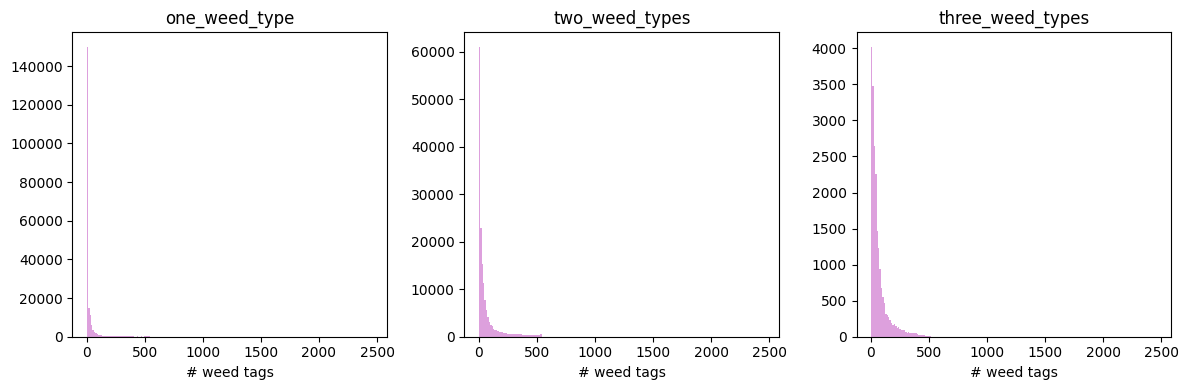

In [72]:
# DISPLAY HISTOGRAMS OF NUM_WEED_TAGS FOR 3 DATASETS (1,2,3 DIFFERENT TYPES OF WEEDS)

one_weed_type_df = images_df[images_df['num_weed_types']==1]
two_weed_type_df = images_df[images_df['num_weed_types']==2]
three_weed_type_df = images_df[images_df['num_weed_types']==3]

min_value = min(images_df['num_weed_tags'])
max_value = max(images_df['num_weed_tags'])

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms on each subplot
axes[0].hist(one_weed_type_df['num_weed_tags'], bins=200, color = 'plum', range=(min_value, max_value))
axes[0].set_title('one_weed_type')
axes[0].set_xlabel('# weed tags')

axes[1].hist(two_weed_type_df['num_weed_tags'], bins=200, color = 'plum', range=(min_value, max_value))
axes[1].set_title('two_weed_types')
axes[1].set_xlabel('# weed tags')

axes[2].hist(three_weed_type_df['num_weed_tags'], bins=200, color = 'plum', range=(min_value, max_value))
axes[2].set_title('three_weed_types')
axes[2].set_xlabel('# weed tags')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()
# images_df['num_weed_tags']

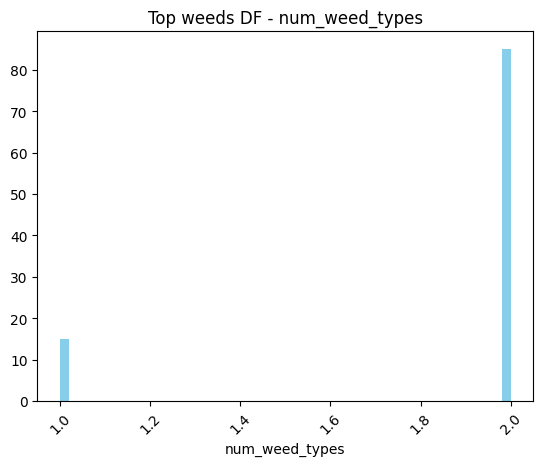

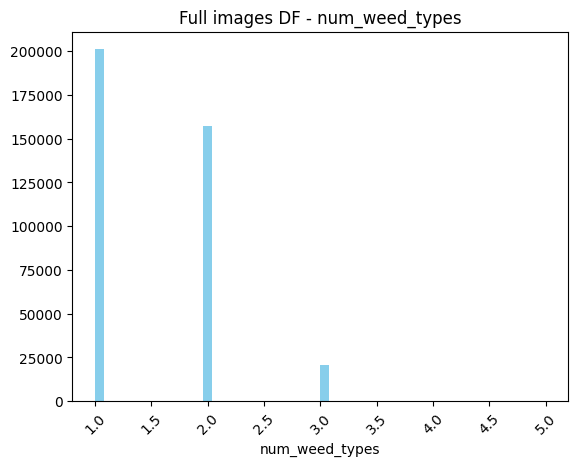

In [31]:
# DISPLAY HISTOGRAM OF NUM OF TYPES FOR IMAGES

plt.hist(top_weeds_df['num_weed_types'], bins=50, color = 'skyblue')
plt.xlabel('num_weed_types')
plt.title('Top weeds DF - num_weed_types')
# plt.yticks(np.around(plt.yticks()[0]))
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()

plt.hist(images_df['num_weed_types'], bins=50, color = 'skyblue')
plt.xlabel('num_weed_types')
plt.title('Full images DF - num_weed_types')
# plt.yticks(np.around(plt.yticks()[0]))
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()

In [8]:
# CALCULATE "NUM WEED TAGS LIST"
# num_weed_tags_list = {}
images_df["num_weed_tags_list"] = None
for i, im_id in enumerate(tqdm(images_df["imageID"])):
    image_stats_list = eval(images_df['stats'][i])
    image_weed_tags_count = []
    for cat in image_stats_list:
        if cat['category'] == categories_dict['weed']:
            image_weed_tags_count.append(cat['tagsCount'])
    images_df.loc[images_df['imageID'] == im_id, "num_weed_tags_list"] = str(image_weed_tags_count)

100%|██████████| 379390/379390 [07:16<00:00, 869.10it/s]


In [15]:
images_df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'imageID',
       'identifier', 'parcelID', 'snapshotDate', 'timeGps', 'uploadDate',
       'fieldID', 'cropID', 'flightID', 'clientID', 'heightAboveGround',
       'quality', 'lat', 'lon', 'flag', 'healthy', 'expertReview',
       'taggerReview', 'taggerDone', 'autoDone', 'blackList', 'hasTiles',
       'format', 'height', 'width', 'focalLength', 'deleted', 'comment',
       'stats', 'stamp', 'plantReport', 'orderID', 'cameraFileName', 'ignored',
       'flightTargetHeight', 'cameraDegree', 'contrast', 'brightness',
       'sharpness', 'typeId', 'groupUUID', 'cameraModel', 'footprintArea',
       'footprintGeography', 'objectDistance', 'cameraAngle',
       'tagsLastVersion', 'imgUrl', 'fieldName', 'farmID', 'farmName',
       'clientName', 'fieldGeojson', 'cropName', 'num_weed_tags',
       'weed_types_ids_list', 'weed_areaPercentage', 'weed_inferenceTagsCount',
       'num_weed_tags_list', 'num_weed_types'],
      

In [ ]:
list(cat_dict_names.values())

In [123]:
np.unique(weed_types_one_weed_type_df)

array([   0,  141,  158,  188,  211,  212,  252,  260,  368,  466,  467,
        657,  858, 1737])

In [124]:
{key: value for key, value in cat_dict_names.items() if key in np.unique(weed_types_one_weed_type_df)}

{141: 'Pigweeds',
 188: 'Barnyard grass',
 211: 'Volunteer soybean',
 212: 'Grass - Unidentified',
 252: 'Blessed milkthistle',
 260: 'Broadleaf buttonweed',
 368: 'Dandelion',
 466: 'Volunteer corn',
 467: 'Crabgrass',
 657: 'Waterhemp',
 858: 'Volunteer Cotton',
 158: 'Broadleaf - Unidentified',
 1737: "Crane's-bill"}

In [135]:
bins_above_100.astype(int)

array([156, 208, 451])

In [141]:
weed_types, weed_types_count = np.unique(weed_types_one_weed_type_df, return_counts=True)

In [145]:
weed_types_count

array([     2,     25, 113490,      7,    607,  55728,      1,      1,
            1,  31293,      1,      1,      2,      1])

In [156]:
weed_types_count[weed_types_count>1000].max()

113490

In [146]:
weed_types[weed_types_count>1000]

array([158, 212, 466])

In [38]:
weed_types, weed_types_count = np.unique(weed_types_one_weed_type_df, return_counts=True)

In [41]:
weed_types[weed_types_count>1000]

array([158, 212, 466])

In [43]:
one_weed_type_df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'imageID',
       'identifier', 'parcelID', 'snapshotDate', 'timeGps', 'uploadDate',
       'fieldID', 'cropID', 'flightID', 'clientID', 'heightAboveGround',
       'quality', 'lat', 'lon', 'flag', 'healthy', 'expertReview',
       'taggerReview', 'taggerDone', 'autoDone', 'blackList', 'hasTiles',
       'format', 'height', 'width', 'focalLength', 'deleted', 'comment',
       'stats', 'stamp', 'plantReport', 'orderID', 'cameraFileName', 'ignored',
       'flightTargetHeight', 'cameraDegree', 'contrast', 'brightness',
       'sharpness', 'typeId', 'groupUUID', 'cameraModel', 'footprintArea',
       'footprintGeography', 'objectDistance', 'cameraAngle',
       'tagsLastVersion', 'imgUrl', 'fieldName', 'farmID', 'farmName',
       'clientName', 'fieldGeojson', 'cropName', 'num_weed_tags',
       'weed_types_ids_list', 'weed_areaPercentage', 'weed_inferenceTagsCount',
       'num_weed_tags_list', 'num_weed_types'],
      

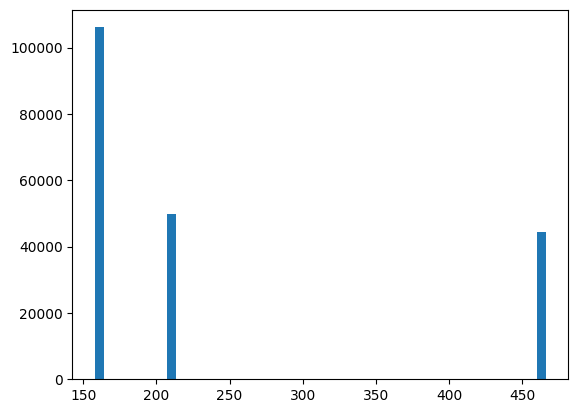

In [54]:
plt.hist(one_weed_type_df_filtered['weed_type_id'], bins = 50)
plt.show()

In [83]:
np.unique(one_weed_type_df_corn['weed_type_id'], return_counts=True)[0]

array([141, 158, 211, 212, 351, 418, 429, 466, 467, 657, 858])

In [85]:
np.unique(one_weed_type_df_corn['weed_type_id'], return_counts=True)[1]

array([   29, 77938,   621, 19809,     2,     3,     1, 43464,     1,
           2,     1])

In [84]:
top_weed_types_corn

array([158, 212, 466])

/tmp/ipykernel_7839/2071067989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_weed_type_df_corn['weed_type_id'] = [item for sublist in one_weed_type_df_corn['weed_types_ids_list'] for item in sublist]
/tmp/ipykernel_7839/2071067989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_weed_type_df_filtered_corn['weed_type_name'] = one_weed_type_df_filtered_corn['weed_type_id'].map(cat_dict_names)
/tmp/ipykernel_7839/2071067989.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy 

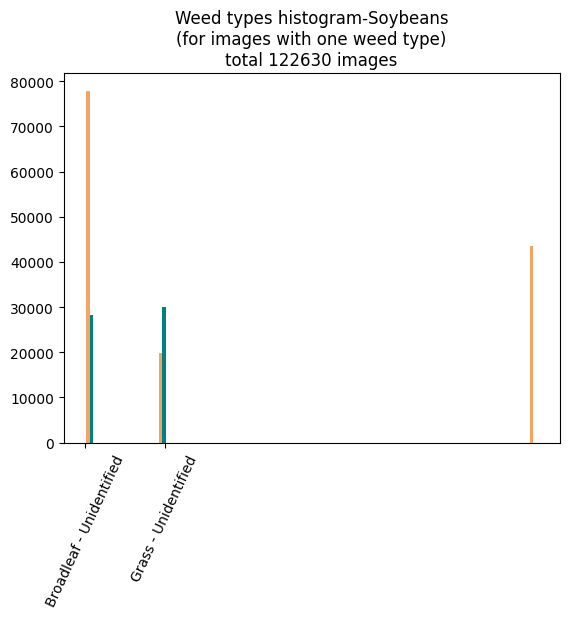

In [73]:
# DISPLAY HISTOGRAMS COLORED BY WITH WEEDS TYPES

corn_df = images_df[images_df['cropName']=="Corn"]
one_weed_type_df_corn = corn_df[corn_df['num_weed_types']==1]
one_weed_type_df_corn['weed_type_id'] = [item for sublist in one_weed_type_df_corn['weed_types_ids_list'] for item in sublist]
weed_types_corn, weed_types_count_corn = np.unique(one_weed_type_df_corn['weed_type_id'], return_counts=True)
top_weed_types_corn = weed_types_corn[weed_types_count_corn>1000]
one_weed_type_df_filtered_corn = one_weed_type_df_corn[one_weed_type_df_corn['weed_type_id'].isin(top_weed_types_corn)]
one_weed_type_df_filtered_corn['weed_type_name'] = one_weed_type_df_filtered_corn['weed_type_id'].map(cat_dict_names)
filtered_cat_dict_names = {key: value for key, value in cat_dict_names.items() if key in np.unique(one_weed_type_df_filtered_corn['weed_type_id'])}


soy_df = images_df[images_df['cropName']=="Soybean"]
one_weed_type_df_soy = soy_df[soy_df['num_weed_types']==1]
one_weed_type_df_soy['weed_type_id'] = [item for sublist in one_weed_type_df_soy['weed_types_ids_list'] for item in sublist]
weed_types_soy, weed_types_count_soy = np.unique(one_weed_type_df_soy['weed_type_id'], return_counts=True)
top_weed_types_soy = weed_types_soy[weed_types_count_soy>1000]
one_weed_type_df_filtered_soy = one_weed_type_df_soy[one_weed_type_df_soy['weed_type_id'].isin(top_weed_types_soy)]
one_weed_type_df_filtered_soy['weed_type_name'] = one_weed_type_df_filtered_soy['weed_type_id'].map(cat_dict_names)
filtered_cat_dict_names = {key: value for key, value in cat_dict_names.items() if key in np.unique(one_weed_type_df_filtered_soy['weed_type_id'])}


# 'skyblue', 'plum', 'coral'
plt.hist([one_weed_type_df_filtered_corn['weed_type_id'], one_weed_type_df_filtered_soy['weed_type_id']], bins = 50, color = ['sandybrown', 'teal'])
plt.title(f'Weed types histogram-Soybeans\n(for images with one weed type)\ntotal {len(current_images_df)} images')
plt.xticks(list(filtered_cat_dict_names.keys()), list(filtered_cat_dict_names.values()), rotation=65)
plt.show()


/tmp/ipykernel_7839/361771241.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_weed_type_df['weed_type_id'] = [item for sublist in one_weed_type_df['weed_types_ids_list'] for item in sublist]
/tmp/ipykernel_7839/361771241.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_weed_type_df_filtered['weed_type_name'] = one_weed_type_df_filtered['weed_type_id'].map(cat_dict_names)


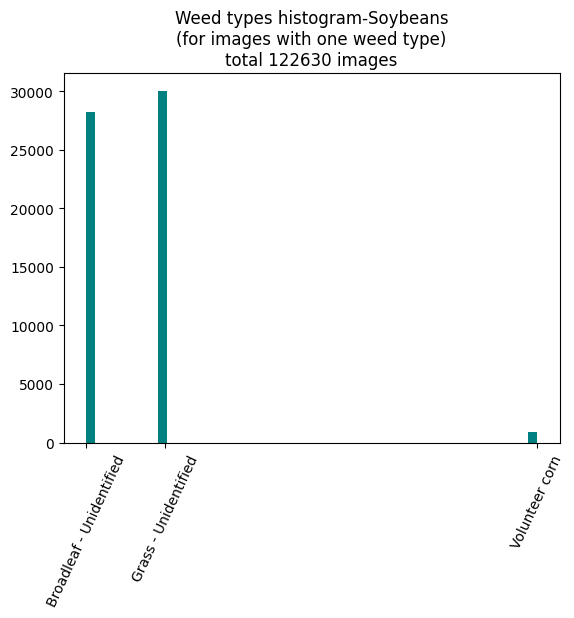

In [70]:
# DISPLAY HISTOGRAMS COLORED BY WITH WEEDS TYPES

# corn_df = images_df[images_df['cropName']=="Corn"]
# soy_df = images_df[images_df['cropName']=="Soybean"]
# current_images_df = soy_df
current_images_df = images_df
one_weed_type_df = current_images_df[current_images_df['num_weed_types']==1]

one_weed_type_df['weed_type_id'] = [item for sublist in one_weed_type_df['weed_types_ids_list'] for item in sublist]
weed_types, weed_types_count = np.unique(weed_types_one_weed_type_df, return_counts=True)
top_weed_types = weed_types[weed_types_count>1000]
one_weed_type_df_filtered = one_weed_type_df[one_weed_type_df['weed_type_id'].isin(top_weed_types)]
one_weed_type_df_filtered['weed_type_name'] = one_weed_type_df_filtered['weed_type_id'].map(cat_dict_names)
filtered_cat_dict_names = {key: value for key, value in cat_dict_names.items() if key in np.unique(one_weed_type_df_filtered['weed_type_id'])}

# 'skyblue', 'plum', 'coral'
plt.hist(one_weed_type_df_filtered['weed_type_id'], bins = 50, color = 'teal')
plt.title(f'Weed types histogram-Soybeans\n(for images with one weed type)\ntotal {len(current_images_df)} images')
plt.xticks(list(filtered_cat_dict_names.keys()), list(filtered_cat_dict_names.values()), rotation=65)
plt.show()


In [19]:
len(images_df)

379390

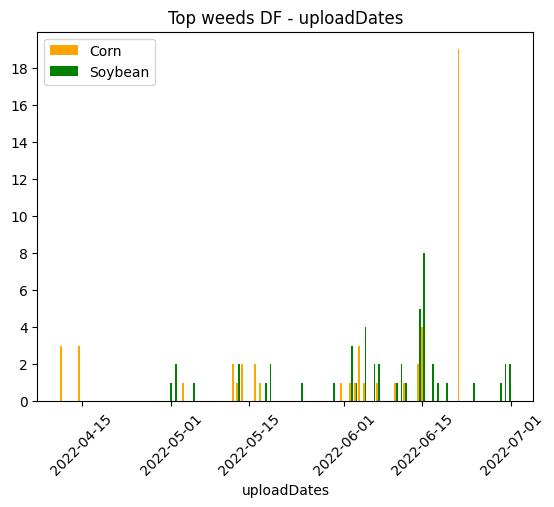

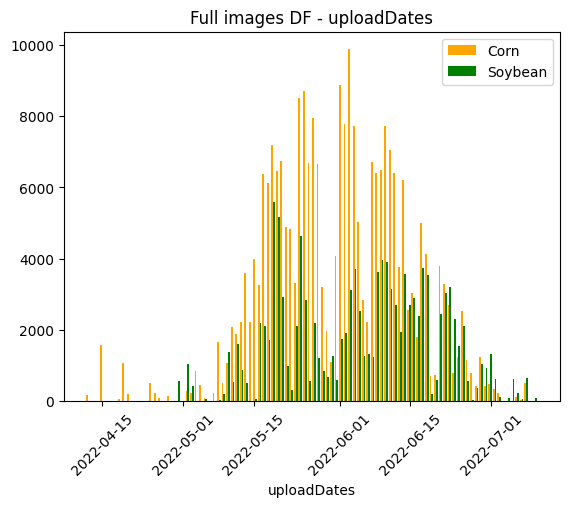

In [21]:
# DISPLAY "UPLOAD DATES" FISTOGRAMS FOR FULL IMAGES DF AND CHOSEN IMAGES DF

colors=['orange', 'green']
names=['Corn', 'Soybean']
# corn_sub_df = list(top_weeds_df[top_weeds_df['cropName']=="Corn"]['uploadDate_time'])
# soy_sub_df = list(top_weeds_df[top_weeds_df['cropName']=="Soybean"]['uploadDate_time'])
soybean_df = top_weeds_df[top_weeds_df['cropName']=='Soybean'].reset_index()
corn_df = top_weeds_df[top_weeds_df['cropName']=='Corn'].reset_index()
soybean_df['uploadDate_date'] = soybean_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())
corn_df['uploadDate_date'] = corn_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())


plt.hist([list(corn_df['uploadDate_date']), list(soybean_df['uploadDate_date'])], bins=100, color=colors, label=names, density=False)
plt.legend()
plt.xlabel('uploadDates')
plt.title('Top weeds DF - uploadDates')
# plt.yticks(np.around(plt.yticks()[0]))
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()


corn_df = list(images_df[images_df['cropName']=="Corn"]['uploadDate_time'])
soy__df = list(images_df[images_df['cropName']=="Soybean"]['uploadDate_time'])
plt.hist([corn_df, soy__df], bins=100, color=colors, label=names, density=False)
plt.legend()
plt.xlabel('uploadDates')
plt.title('Full images DF - uploadDates')
plt.locator_params(axis='y', nbins=10)
plt.xticks(rotation=45)
plt.show()

In [9]:
soybean_df = top_weeds_df[top_weeds_df['cropName']=='Soybean']
earliest_soybean_image_in_df = soybean_df.loc[soybean_df['uploadDate_time'].idxmin()]['imageID']
latest_soybean_image_in_df = soybean_df.loc[soybean_df['uploadDate_time'].idxmax()]['imageID']

In [29]:
earliest_soy_images = soybean_df[soybean_df['uploadDate_date'] == soybean_df['uploadDate_date'].min()]

In [35]:
corn_df['uploadDate_date'].min()

datetime.date(2022, 4, 11)

In [36]:
earliest_corn_images = corn_df[corn_df['uploadDate_date'] == corn_df['uploadDate_date'].min()]

In [ ]:
corn_df[corn_df['uploadDate_date'] == corn_df['uploadDate_date'].max()]

In [41]:
corn_df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'imageID', 'identifier', 'parcelID', 'snapshotDate',
       'timeGps', 'uploadDate', 'fieldID', 'cropID', 'flightID', 'clientID',
       'heightAboveGround', 'quality', 'lat', 'lon', 'flag', 'healthy',
       'expertReview', 'taggerReview', 'taggerDone', 'autoDone', 'blackList',
       'hasTiles', 'format', 'height', 'width', 'focalLength', 'deleted',
       'comment', 'stats', 'stamp', 'plantReport', 'orderID', 'cameraFileName',
       'ignored', 'flightTargetHeight', 'cameraDegree', 'contrast',
       'brightness', 'sharpness', 'typeId', 'groupUUID', 'cameraModel',
       'footprintArea', 'footprintGeography', 'objectDistance', 'cameraAngle',
       'tagsLastVersion', 'imgUrl', 'fieldName', 'farmID', 'farmName',
       'clientName', 'fieldGeojson', 'cropName', 'num_weed_tags',
       'weed_types_ids_list', 'weed_areaPercentage', 'weed_inferenceTagsCount',
       'wideImageID', 'uploadDate_time

In [34]:
corn_df = top_weeds_df[top_weeds_df['cropName']=='Corn']
corn_df['uploadDate_date'] = corn_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())

/tmp/ipykernel_13273/3848883240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_df['uploadDate_date'] = corn_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())


In [12]:
len(earliest_corn_images)

3

Zoom image id: 8488573
Wide image id: 8493169


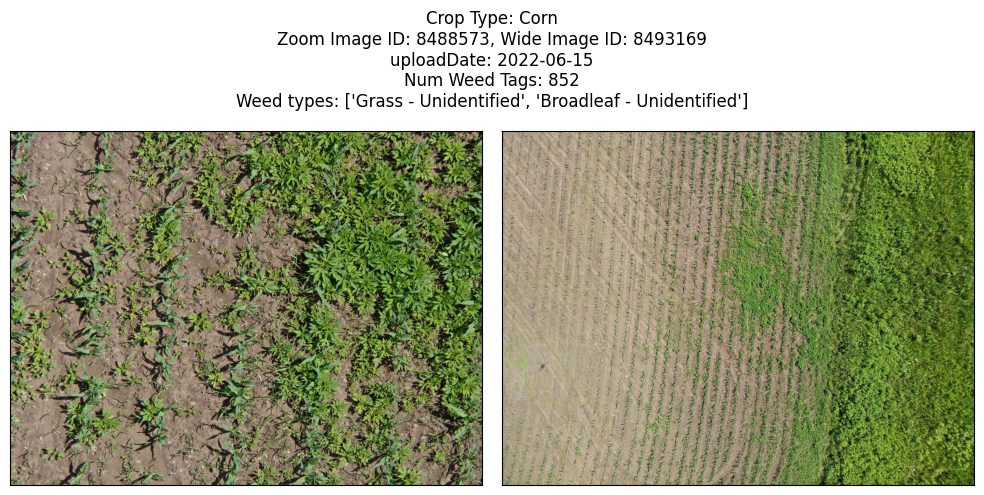

In [13]:
# SHOW ZOOM-WIDE COUPLE OF IMAGES FROM THE DATAFRAME


# CHOOSE EXAMPLE IMAGE
soybean_df = top_weeds_df[top_weeds_df['cropName']=='Soybean'].reset_index()
soybean_df['uploadDate_date'] = soybean_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())
earliest_soy_images = soybean_df[soybean_df['uploadDate_date'] == soybean_df['uploadDate_date'].min()].reset_index()
latest_soy_images = soybean_df[soybean_df['uploadDate_date'] == soybean_df['uploadDate_date'].max()].reset_index()

corn_df = top_weeds_df[top_weeds_df['cropName']=='Corn'].reset_index()
corn_df['uploadDate_date'] = corn_df['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())
earliest_corn_images = corn_df[corn_df['uploadDate_date'] == corn_df['uploadDate_date'].min()].reset_index()
latest_corn_images = corn_df[corn_df['uploadDate_date'] == corn_df['uploadDate_date'].max()].reset_index()

latest_image_in_df = top_weeds_df.loc[top_weeds_df['uploadDate_time'].idxmax()]['imageID']
earliest_image_in_df = top_weeds_df.loc[top_weeds_df['uploadDate_time'].idxmin()]['imageID']
random_image_id = random.sample(list(top_weeds_df['imageID']), 1)[0]

for i in range(1):
# for i in range(len(latest_soy_images)):
#     example_image_id = latest_soy_images['imageID'][i]
    example_image_id = 8488573


    # SHOW IMAGES
    print(f"Zoom image id: {example_image_id}")

    image_data = top_weeds_df[top_weeds_df['imageID'] == example_image_id].reset_index()
    matching_wide_image_id = int(image_data.at[0, 'wideImageID'])
    print(f"Wide image id: {matching_wide_image_id}")
    image_num_tags = image_data.at[0, 'num_weed_tags']
    image_crop_name = image_data.at[0, 'cropName']
    upload_date = image_data.at[0, 'uploadDate_date']
    weed_types = image_data.at[0, 'weed_types_ids_list']
    weed_types = list(map(cat_dict_names.get, weed_types))


    im_path = env.download_image(int(example_image_id))
    image = io.imread(im_path)

    wide_im_path = env.download_image(int(matching_wide_image_id))
    wide_image = io.imread(wide_im_path)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].imshow(image, extent=[0, image.shape[1], 0, image.shape[0]])
    axes[1].imshow(wide_image, extent=[0, wide_image.shape[1], 0, wide_image.shape[0]])


    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    fig.set_size_inches(10, 5)
    plt.suptitle(f"Crop Type: {image_crop_name}\nZoom Image ID: {example_image_id}, Wide Image ID: {matching_wide_image_id}\nuploadDate: {upload_date}\nNum Weed Tags: {image_num_tags}\nWeed types: {weed_types}")
    plt.tight_layout()
    plt.show()

# cat_dict_names

# Checkups

In [ ]:
# VIEW AND FIND INFORMATION ABOUT NUMBER OF WEED TAGS IN THE IMAGES
images_with_weeds_df = images_df[images_df['num_weed_tags']>5]
print(len(images_with_weeds_df))
plt.hist(images_with_weeds_df['num_weed_tags'], bins=100)
plt.show()

In [2]:
images_df = pd.read_csv("/mnt/disks/datasets/wide_images/images_df_new_1.csv")

In [24]:
images_df[images_df['weed_tags_data'].notna()]

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,imageID,identifier,parcelID,snapshotDate,timeGps,uploadDate,...,imgUrl,fieldName,farmID,farmName,clientName,fieldGeojson,cropName,num_weed_tags,weed_types_dict,weed_tags_data


In [80]:
unique_weed_types = np.unique(images_df['weed_types_ids_list'].explode(), return_counts=True)
# unique_weed_types[0][np.where(unique_weed_types[1]>100)]

In [81]:
len(unique_weed_types[0])

31

In [5]:
# GET WEEDS CATEGOTY ID
categories_hierarchy = env.eti_api.get_categories_hierarchy()
for i in range(len(categories_hierarchy)):
    print(f"index {i}, category: {categories_hierarchy[i]['id']}")

# GET LIST OF SUBCATEGORIES IDS
weeds_subcategories_ids = [categories_hierarchy[9]['subCategories'][i]['id'] for i in range(len(categories_hierarchy[9]['subCategories']))]

index 0, category: 6
index 1, category: 8
index 2, category: 9
index 3, category: 11
index 4, category: 19
index 5, category: 24
index 6, category: 25
index 7, category: 22
index 8, category: 2
index 9, category: 5
index 10, category: 3
